# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective 

At the end of the experiment, you will be able to:

*  understand clustering
*  find groups or clusters using K-means algorithm

In [1]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/3March/kmeans.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description

The dataset choosen for this experiment is a hand-made dataset. We have generated the data programmatically by following Random / Gaussian distribution. The dataset includes 3000 instances where each instance is made up of 2 features.

## AIML Technique

### Clustering

Given an unfamiliar dataset, a clustering algorithm helps to discover groups of objects where the average distances between the members of each cluster are closer than to members in other clusters.

Clustering is used to find structure in unlabeled data. It’s the most common form of unsupervised learning. 

Several Algorithms have been proposed for clustering. However, when compared to other clustering algorithms the K-means algorithm is more effective. This is because K-means allows us to pre-cluster the database which in turn produces good results.

Additionally, K-means clustering is the simplest to implement and to run. All we need to do is choose the number of clusters(K) and run it number of times.

We use K-means algorithm for clustering in this experiment.

### K-means Algorithm

K-means clustering is the process of partitioning a set of data objects into subsets. Each subset is a cluster such that the similarity within the cluster is greater and the similarity between the other clusters is less. 

K-means algorithm iteratively performs the following steps: 

1. Determine the value “K”, the value “K” represents the number of clusters.
2. Select "K" points at random as cluster centers.
3. Assign data points to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all the data points in each cluster.
5. Repeat steps 3 and 4 until the same points are assigned to each cluster and compute till convergence.


In [2]:
 ! wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/DS_CLARA_STD.csv

--2022-01-22 10:58:30--  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/DS_CLARA_STD.csv
Resolving cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)... 172.105.52.210
Connecting to cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54497 (53K) [application/octet-stream]
Saving to: ‘DS_CLARA_STD.csv’

DS_CLARA_STD.csv    100%[===================>]  53.22K   252KB/s    in 0.2s    

2022-01-22 10:58:32 (252 KB/s) - ‘DS_CLARA_STD.csv’ saved [54497/54497]



### Importing required packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from copy import deepcopy

### Load the dataset

In [4]:
# Setting up the file. The data below is a simple Gaussian distribution of data.
dataset = "DS_CLARA_STD.csv"

In [5]:
# Load the data
data = pd.read_csv(dataset)
print(data.head())

          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729


### Get the data values 

In [6]:
# Storing the values in seperate variables
f1 = data['V1'].values
f2 = data['V2'].values

# Combining f1 and f2 into a single array
X = np.array(list(zip(f1, f2)))
X.shape

(3000, 2)

### Visualize the data values

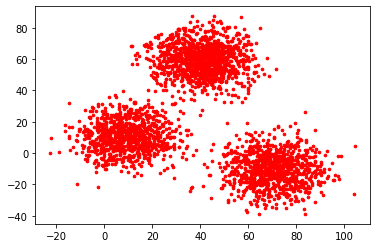

In [7]:
plt.scatter(f1, f2, c='red', s=7)
plt.show()

### Lets intialize three cluster centers randomly to start with the k-means algorithm

Note: Refer to [np.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

In [8]:
# Number of clusters
k = 3

# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k) 

# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[ 9. 22.]
 [79. 44.]
 [57. 13.]]


### Let us visualize the data when the algorithm gets intialized along with the Centroids

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


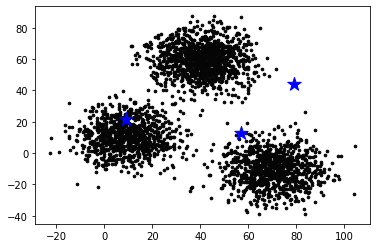

In [9]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='B')
plt.show()

### Applying  K-means algorithm 

Now lets learn from above together and see how exactly k-means algorithm works.



Now lets write a function to calculate Euclidean Distance between two array of points 'a' and 'b' or centroids

**Note:** Refer to the following link to understand how [linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) works

In [10]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

[14.453804 23.682186]
[45.834576 61.65302 ]
[67.991585  -7.5096407]
Error: 44.56016540527344

[ 9.874232 11.658584]
[41.0413   60.137375]
[ 69.81342  -10.103229]
Error: 14.172435760498047

[ 9.487808 10.718649]
[40.703156 59.733047]
[ 69.92419  -10.119641]
Error: 1.1502879858016968

[ 9.478045 10.686052]
[40.683628 59.715893]
[ 69.92419  -10.119641]
Error: 0.04281884431838989



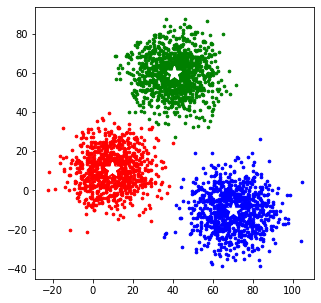

In [11]:
# To store the value of centroids. Initialize with zero
C_old = np.zeros(C.shape)

# Initialize clusters of x[i] with zeros
clusters = np.zeros(len(X))

# Error func - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()       # Plot keeps getting updated in loop, So turning on plot in interactive mode
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each sample/data point to its closest cluster  
    for i in range(len(X)):
        distances = dist(X[i], C) # Compute the distance between data points and 3 centroids
        cluster = np.argmin(distances)  # The centroid with the least distance is found here out of all the distances found above
        clusters[i] = cluster    # The cluster center found above is now the new cluster assignment for the point X[i]
        
    # Storing the old centroid values
    C_old = deepcopy(C)   # We use deep copy here because we don't want the changes in array C to be reflecting in C_old (because assignment is by reference)
    
    # Finding the new centroids by taking the mean value
    for i in range(k):     # We iterate through each of the 3 clusters.
        points = [X[j] for j in range(len(X)) if clusters[j] == i]  # We pull out all the points that were assigned to the new cluster above (in 'clusters' variable)
        C[i] = np.mean(points, axis=0)   # Using the points above, we recompute the new centroid, by taking the mean.
        print(C[i])
    error = dist(C, C_old, None) # Now we compare the error between the new cluster centers and the old cluster centers.
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='w')
    print(f"Error: {error}\n")

### Applying K-means from sklearn
**Note:** Refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0) # The number of clusters to generate
y_pred = kmeans.fit_predict(X) # Fit and predict the data using k-means

In [13]:
# Print the cluster centroids
kmeans.cluster_centers_

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

### Finding the number of clusters using Elbow Method

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie.., the point after which the distortion/inertia start decreasing in a linear fashion.

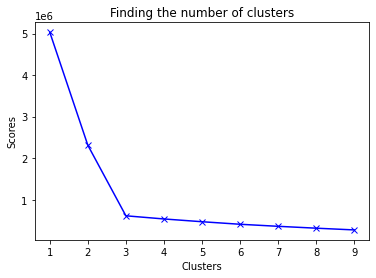

In [14]:
scores = []

for i in range(1, 10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  scores.append(kmeans.inertia_)

plt.plot(range(1, 10), scores, 'bx-')
plt.title('Finding the number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

From the above Elbow Method we can choose the number of clusters as 3